In [1]:
# !pip install -r requirements.txt

In [2]:
# Kütüphane imlementasyonları
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
import seaborn as sns
import statsmodels.formula.api as smf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Veriyi dosyadan okuma
house_df = pd.read_csv("./data/house_price.csv")
display(house_df.head(20))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
# Verinin incelenmesi
print(house_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
display(house_df.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Non-int ve non-float olan değerlerin sayısallaştırılması
label_encoder = preprocessing.LabelEncoder()

for i in house_df.columns:
    if house_df[i].dtype == "O":
        house_df[i] = label_encoder.fit_transform(house_df[i])

# Target (SalePrice) için eğitimde kullanılabilecek kolanların tespiti
correlations = house_df.corr()

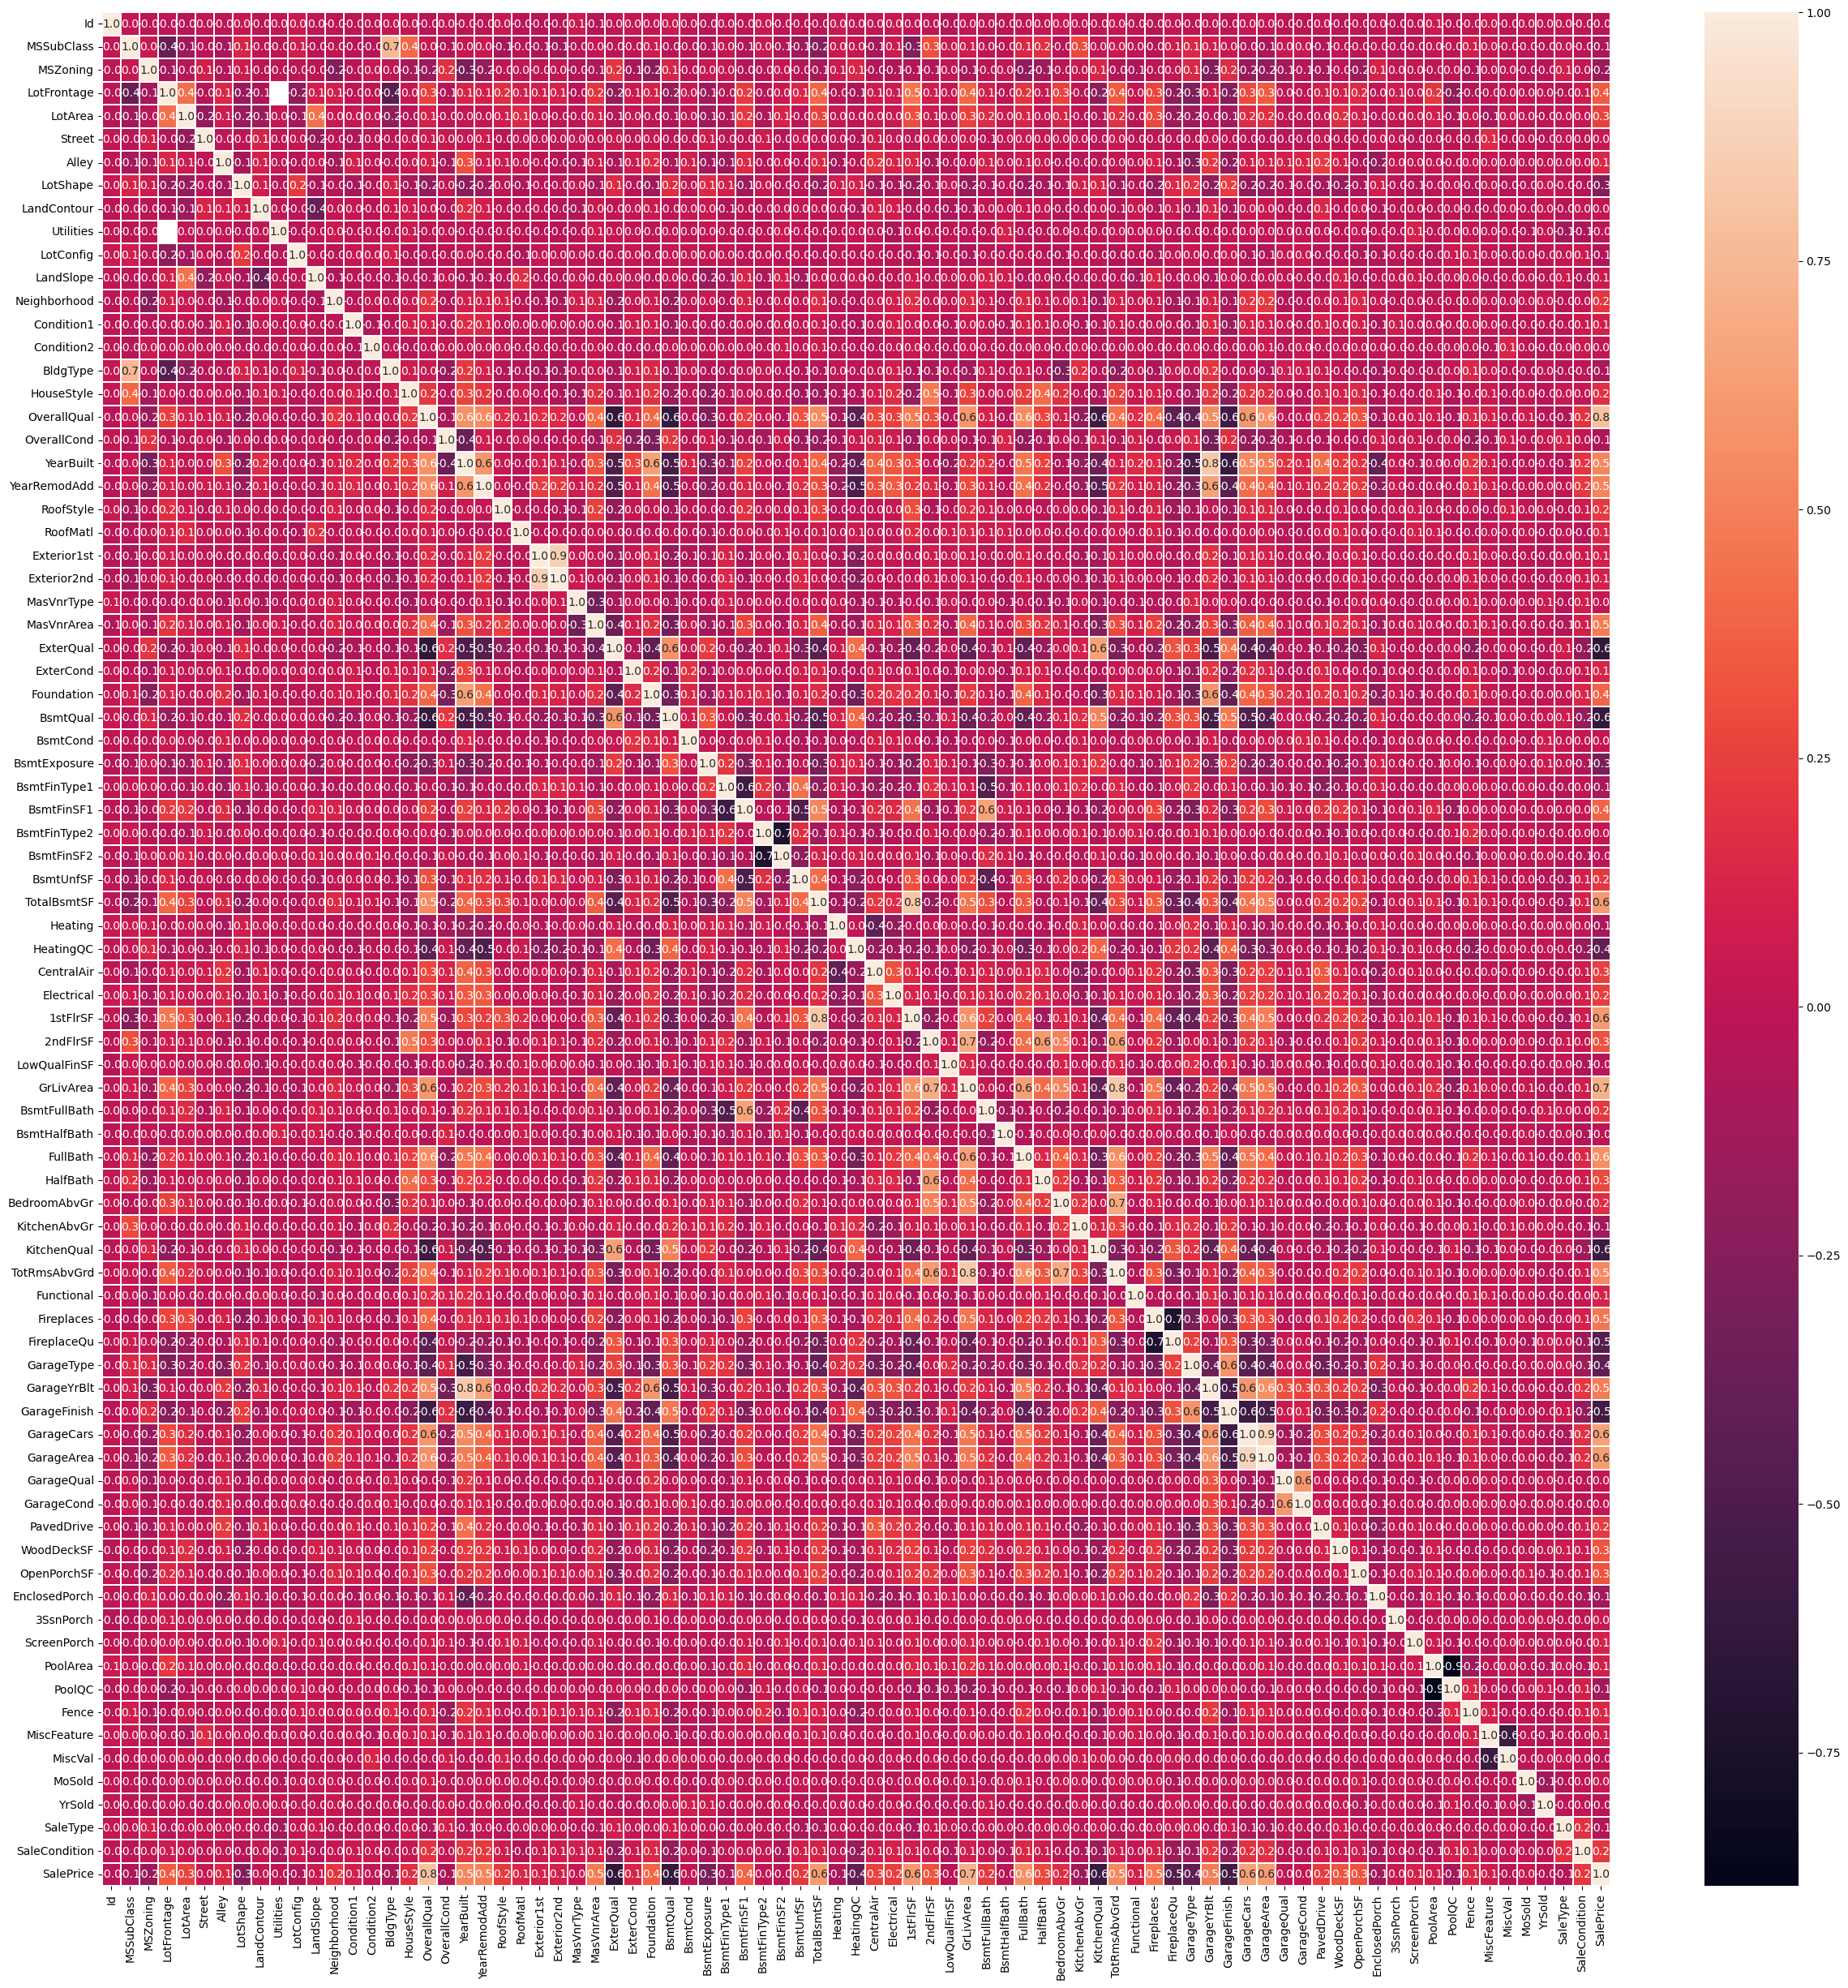

In [7]:
f = plt.subplots(figsize=(30, 30))
sns.heatmap(data=correlations, annot=True, fmt=".1f", linewidths=0.1)
plt.show()

In [8]:
# Hepsi ve çoğunluğu NaN olan kolonların atılması. Korelasyonda da etkileri düşük
column_with_NaN = ["Alley", "PoolQC","PoolArea","Fence", "MiscVal"]

In [9]:
# Target ile korelasyonu yüksek değerlerin seçilmesi
selected_train_column = correlations.loc[correlations.SalePrice >= 0.5].T.columns
selected_train_column = list(selected_train_column)

In [10]:
print(selected_train_column)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


In [11]:
# Yapılan denemeler sonucu "LotFrontage" kolonu tahmin için olumlu etki oluşturduğu için eklendi.
selected_train_column.insert(2,"LotFrontage")

# Seçilen ve aralarında yüksek korelasyon olan gereksiz kolonlar atıldı.
selected_train_column.remove("YearRemodAdd")
selected_train_column.remove("GarageArea")
selected_train_column.remove("TotRmsAbvGrd")
selected_train_column.remove("1stFlrSF")

In [12]:
train_data = house_df[selected_train_column]

In [13]:
# NaN değer tespiti
train_data.isna().sum()

OverallQual      0
YearBuilt        0
LotFrontage    259
TotalBsmtSF      0
GrLivArea        0
FullBath         0
GarageCars       0
SalePrice        0
dtype: int64

In [14]:
train_data.LotFrontage.fillna(train_data.LotFrontage.mean(), inplace=True)

C:\Users\Akadir\AppData\Local\Temp\ipykernel_12136\2166672663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.LotFrontage.fillna(train_data.LotFrontage.mean(), inplace=True)


In [15]:
train_data.isna().sum()

OverallQual    0
YearBuilt      0
LotFrontage    0
TotalBsmtSF    0
GrLivArea      0
FullBath       0
GarageCars     0
SalePrice      0
dtype: int64

In [16]:
# Tahmin için normalize edilecek değerlerden gerçek değeri elde etmek amacıyla aşağıda ki değer değişkenkleri oluşturuldu
pred_mean = train_data[train_data.columns[:7]].mean()
pred_std = train_data[train_data.columns[:7]].std()

target_mean = train_data.SalePrice.mean()
target_std = train_data.SalePrice.std()

In [17]:
# Veri normalizasyonu
train_data = train_data.apply(lambda data: (data-(data.mean()))/data.std())

In [18]:
train_data.head(10)

,OverallQual,YearBuilt,LotFrontage,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
0,0.651256,1.050634,-2.292932e-01,-0.459145,0.370207,0.789470,0.311618,0.347154
1,-0.071812,0.156680,4.517813e-01,0.466305,-0.482347,0.789470,0.311618,0.007286
2,0.651256,0.984415,-9.307829e-02,-0.313261,0.514836,0.789470,0.311618,0.535970
3,0.651256,-1.862993,-4.563180e-01,-0.687089,0.383528,-1.025689,1.649742,-0.515105
4,1.374324,0.951306,6.334012e-01,0.199611,1.298881,0.789470,1.649742,0.869545
5,-0.794879,0.719540,6.788061e-01,-0.595911,-0.292045,-1.025689,0.311618,-0.477341
6,1.374324,1.083743,2.247565e-01,1.432785,0.339758,0.789470,0.311618,1.587045
7,0.651256,0.057352,1.032389e-14,0.112993,1.093354,0.789470,0.311618,0.240159
8,0.651256,-1.333243,-8.649627e-01,-0.240320,0.492000,0.789470,0.311618,-0.642241
9,-0.794879,-1.068368,-9.103677e-01,-0.151422,-0.834405,-1.025689,-1.026506,-0.792034


In [19]:
# Statsmodel'de değerlendirme yapmak için
train_data2 = train_data.copy()

In [20]:
# Verinin train ve target olarak ayrılması
target_data = train_data.SalePrice

In [21]:
train_data.drop(columns="SalePrice", inplace=True)

In [22]:
# Train ve target olarak ayrılan verinin train ve test olarak ayrılması
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.1, random_state=42)

print('train shape', x_train.shape, y_train.shape)
print('test shape', x_test.shape, y_test.shape)

train shape (1314, 7) (1314,)
test shape (146, 7) (146,)


In [23]:
# Bu kısım eğitim için bağımlı ve bağımsız değişkenlerin tespiti ve eğitimin optimizasyonu hakkında bilgi sahibi olmak için kullanıldı
import statsmodels.formula.api as smf

model_stats = smf.ols("SalePrice ~ OverallQual + YearBuilt + LotFrontage + TotalBsmtSF + GrLivArea + FullBath + GarageCars", data=train_data2)
results = model_stats.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     690.3
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        07:11:38   Log-Likelihood:                -1001.6
No. Observations:                1460   AIC:                             2019.
Df Residuals:                    1452   BIC:                             2062.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.141e-16      0.013   9.04e-15      

In [24]:
# Sürekli değer tahmini yapılacağı için linear Regresyon modelinin oluşturulması
def build_model():
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(8, activation='relu',))
    model.add(Dense(1))
    
    model.compile(optimizer="sgd", loss="mse", metrics=["mae"])
    
    return model

In [25]:
# Model oluşturulması ve mimarisi
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Eğitim bloğu
history = model.fit(x_train, y_train, epochs=30, batch_size=64)

Epoch 1/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6421 - mae: 0.5319
Epoch 2/30
21/21 [==============================] - 0s 2ms/step - loss: 0.3621 - mae: 0.3956
Epoch 3/30
21/21 [==============================] - 0s 2ms/step - loss: 0.3251 - mae: 0.3621
Epoch 4/30
21/21 [==============================] - 0s 2ms/step - loss: 0.3001 - mae: 0.3457
Epoch 5/30
21/21 [==============================] - 0s 2ms/step - loss: 0.2875 - mae: 0.3335
Epoch 6/30
21/21 [==============================] - 0s 2ms/step - loss: 0.2750 - mae: 0.3256
Epoch 7/30
21/21 [==============================] - 0s 2ms/step - loss: 0.2669 - mae: 0.3192
Epoch 8/30
21/21 [==============================] - 0s 2ms/step - loss: 0.2549 - mae: 0.3130
Epoch 9/30
21/21 [==============================] - 0s 2ms/step - loss: 0.2445 - mae: 0.3074
Epoch 10/30
21/21 [==============================] - 0s 1ms/step - loss: 0.2412 - mae: 0.3031
Epoch 11/30
21/21 [==============================] - 0s 2ms/step - lo

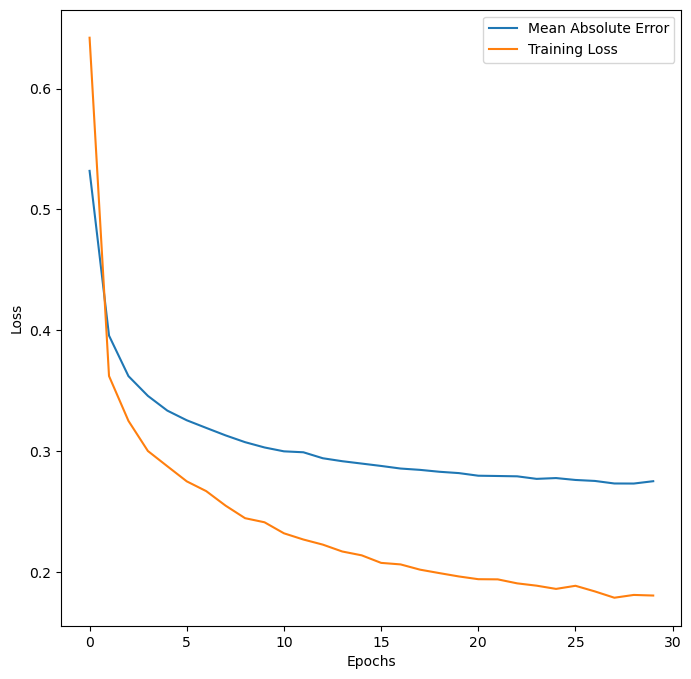

In [27]:
# Eğitim hakkında grafik
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['mae'], label = 'Mean Absolute Error')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

plot_loss(history)

In [28]:
evaluation = model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.2054 - mae: 0.2573


In [29]:
predicted_value = model.predict(x_test)

5/5 [==============================] - 0s 3ms/step


In [30]:
predicted_value = pd.DataFrame(predicted_value, columns=["Predicted Value"])
predicted_value= (predicted_value*target_std)+target_mean

In [31]:
# Değerlendirme matrisi için normalize edilen verinin normal haline getirilmesi (SalePrice kolonu hariç)
eval_df = (x_test*pred_std)+pred_mean
eval_df.reset_index(inplace=True)
eval_df.drop(columns=["index"], inplace=True)

In [32]:
# Normalize edilen SalePrice kolonunun normal haline getirilmesi
real_price = ((y_test*target_std)+target_mean).reset_index()
real_price.drop(columns=["index"])

,SalePrice
0,154500.0
1,325000.0
2,115000.0
3,159000.0
4,315500.0
...,...
141,132000.0
142,178000.0
143,136500.0
144,145000.0


In [33]:
# Değerlendirme tablosuna gerçek ve tahmin edilen değerlerin dataframe'ye kolon eklenmesi
eval_df["Real Price"] = real_price.SalePrice
eval_df["Predicted Price"] = round(predicted_value)

In [34]:
eval_df

,OverallQual,YearBuilt,LotFrontage,TotalBsmtSF,GrLivArea,FullBath,GarageCars,Real Price,Predicted Price
0,6.0,1963.0,70.0,1059.0,1068.0,1.0,1.0,154500.0,131087.0
1,8.0,1994.0,98.0,1463.0,2622.0,2.0,2.0,325000.0,307341.0
2,5.0,1927.0,56.0,1008.0,1028.0,1.0,2.0,115000.0,131972.0
3,6.0,1947.0,50.0,1004.0,1664.0,2.0,2.0,159000.0,181194.0
4,9.0,2007.0,89.0,1620.0,1620.0,2.0,3.0,315500.0,323866.0
...,...,...,...,...,...,...,...,...,...
141,5.0,1956.0,70.0,928.0,928.0,1.0,1.0,132000.0,120877.0
142,6.0,1985.0,77.0,741.0,1732.0,2.0,2.0,178000.0,183656.0
143,6.0,1925.0,60.0,1181.0,1694.0,2.0,2.0,136500.0,185678.0
144,5.0,1955.0,100.0,1056.0,1056.0,1.0,2.0,145000.0,141116.0


In [35]:
eval_df[["Real Price","Predicted Price"]]

,Real Price,Predicted Price
0,154500.0,131087.0
1,325000.0,307341.0
2,115000.0,131972.0
3,159000.0,181194.0
4,315500.0,323866.0
...,...,...
141,132000.0,120877.0
142,178000.0,183656.0
143,136500.0,185678.0
144,145000.0,141116.0
